In [1]:
!pip install neuron

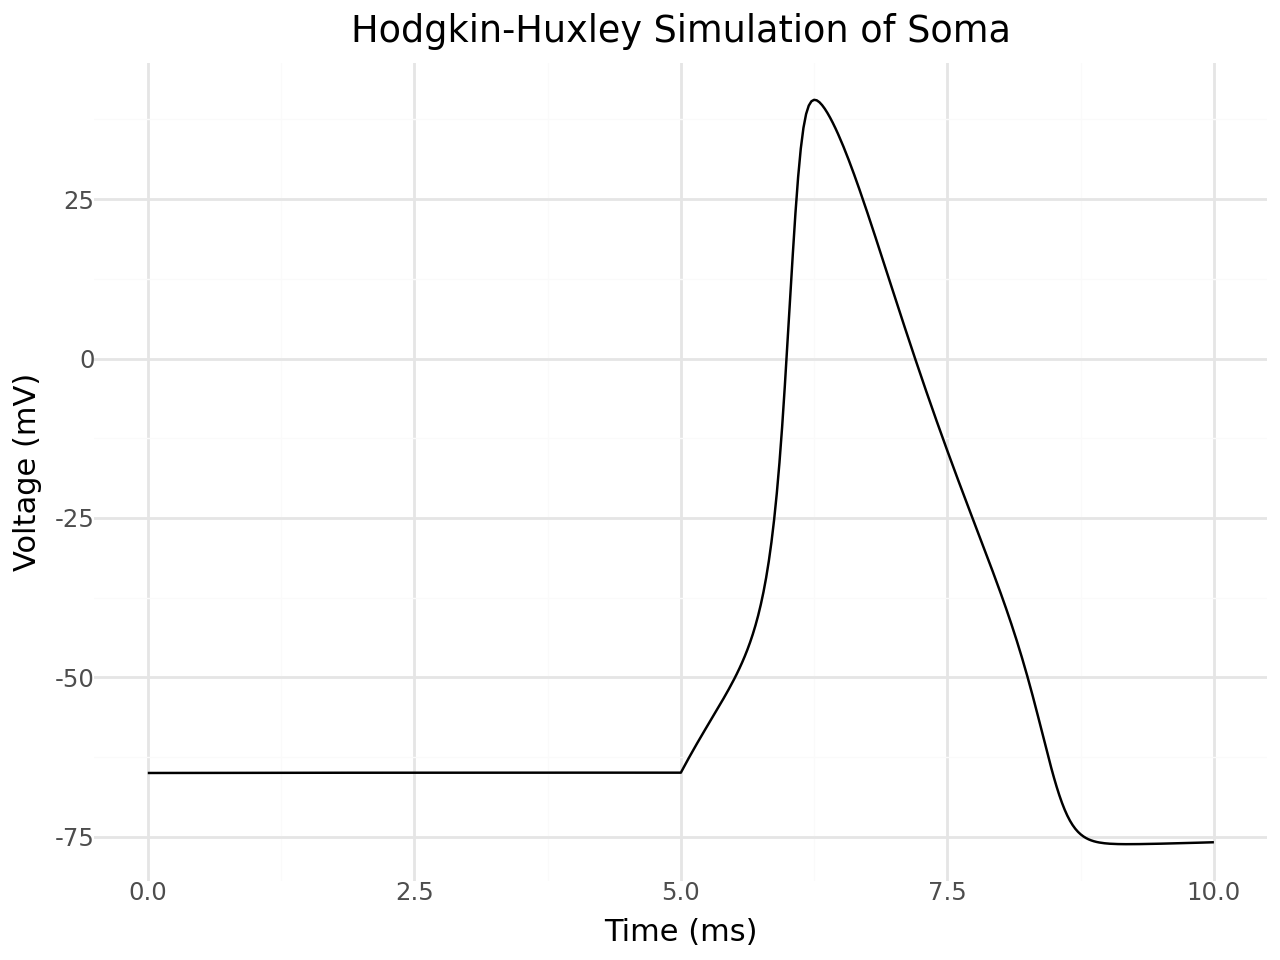

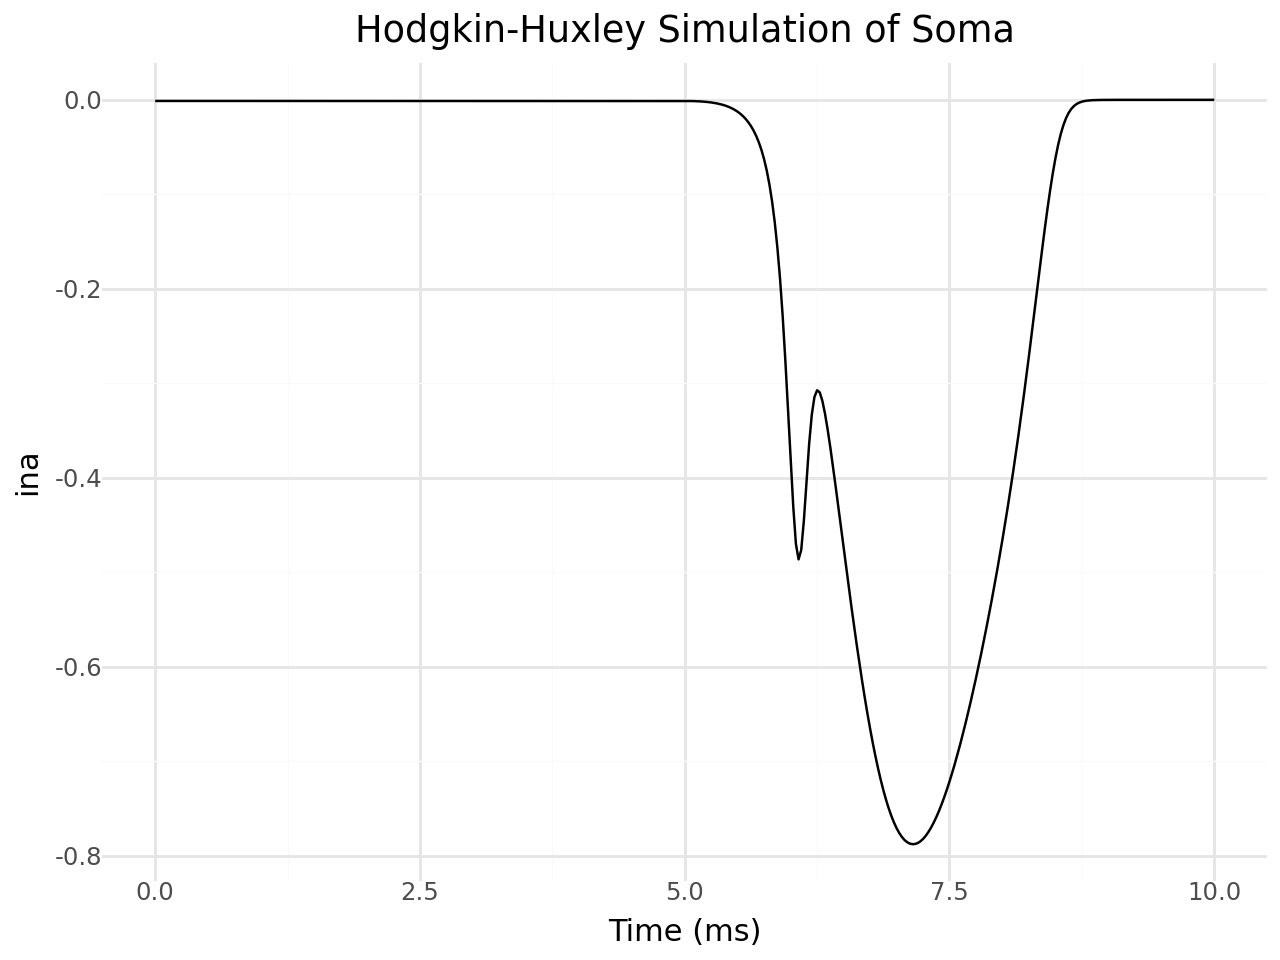

In [5]:
from neuron.units import mV, ms, µm
import matplotlib.pyplot as plt
from neuron import h
import pandas as pd
from plotnine import ggplot, aes, geom_line, theme_minimal, ggtitle, xlab, ylab
h.load_file("stdrun.hoc")

#
# Define the model cell and its dynamics
#

# Create a soma section
soma = h.Section('soma')
soma.L = 10 * µm
soma.diam = 10 * µm
soma.nseg = 1  # single compartment (soma)

# Insert Hodgkin-Huxley mechanisms
soma.insert(h.hh)

#
# setup the experiment: current clamp
#

# Create the current clamp
stim = h.IClamp(soma(0.5))  # Inject current at the center of the soma
stim.delay = 5 * ms
stim.dur = 1 * ms
stim.amp = 0.1  # nA

#
# setup the instrumentation: record time and voltage
#

# Set up the recording of time and voltage
tvec = h.Vector().record(h._ref_t)
vvec = h.Vector().record(soma(0.5)._ref_v)
inavec = h.Vector().record(soma(0.5)._ref_ina)

#
# do the experiment
#

# Run the simulation
h.finitialize(-65)
h.continuerun(10)

#
# analyze the results (in our case, this is just to make a picture)
#

# Create a DataFrame for plotting
data = pd.DataFrame({'Time (ms)': tvec, 'Voltage (mV)': vvec, "ina": inavec})

# Plot the results using plotnine
plot = (ggplot(data, aes(x='Time (ms)', y='Voltage (mV)')) +
        geom_line() +
        theme_minimal() +
        ggtitle('Hodgkin-Huxley Simulation of Soma') +
        xlab('Time (ms)') +
        ylab('Voltage (mV)'))

plot2 = (ggplot(data, aes(x='Time (ms)', y='ina')) +
        geom_line() +
        theme_minimal() +
        ggtitle('Hodgkin-Huxley Simulation of Soma'))

# Show the plot
plot.show()
plot2.show()